# Results notebook
---
Notebook for results

## Set up

In [1]:
import os
import pandas as pd
import numpy as np
import get_data 
import get_patient
import get_PPI
import get_network_analysis
from get_data import UC_bin_97_5, CD_bin_97_5, CD_bin_99, UC_bin_99, CD_bin_95, UC_bin_95, genepy_df
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [34]:
from get_data import genepy_bin_95, IBDU_bin_95, UC_CD_bin_95, NOT_IBD_95

## Remove patients not CD or UC


In [37]:
CD = get_data.get_diagnosis_df(genepy_bin_95, 'CD')
UC = get_data.get_diagnosis_df(genepy_bin_95, 'UC') 

CD_UC_only = pd.concat([CD,UC])

In [50]:
CD_UC_only

,A1BG,A1CF,A2ML1,A2M,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
IID,,,,,,,,,,,,,,,,,,,,,
AP0013,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP0276,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SORL0037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SORL0038,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Represent Binarised method between groups
total / CD / UC

In [42]:
CD_bin_head = get_data.get_top_bin_sum(CD_bin_95)
UC_bin_head = UC_bin_95[get_data.get_top_bin_sum(CD_bin_95).index].sum()
genepy_bin_head = CD_UC_only[get_data.get_top_bin_sum(CD_bin_95).index].sum()



All_3 = pd.concat([CD_bin_head, UC_bin_head, genepy_bin_head],axis=1)
All_3.columns = ['CD n=681', 'UC n=368', 'Total n=1049']

In [43]:
All_3

,CD n=681,UC n=368,Total n=1049
NOD2,47,7,54
WDFY4,46,8,54
ARL5C,43,12,55
PHPT1,43,10,53
SETD2,43,11,54
FAM161A,43,11,54
RNF43,42,10,52
C7orf31,42,9,51
SIDT1,42,10,52
METTL11B,42,8,50


### Create latext file

In [49]:
All_3.to_csv('all_3.csv')

In [48]:
with open('table.tbl','w') as f:
    f.write(All_3.to_latex(index=True))

In [46]:
# Set column header to bold title case
All_3.columns = (All_3.columns.to_series().apply(lambda r: "\\textbf}".format(r.replace("_", " ").title())))

# Write to file
with open(os.path.splitext(os.path.basename(__file__))[0] + ".tbl", "w") as f:
    format = "l" + \
    "@{\hskip 12pt}" +\
    4*"S[table-format = 2.2]"
    

ValueError: Single '}' encountered in format string

### Mann-Whitney U test 
compare between groups - check binarise method is significant 

In [16]:
# remove PDE11A
CD_bin_95 = CD_bin_95.drop(['PDE11A'], axis=1)
UC_bin_95 = UC_bin_95.drop(['PDE11A'], axis=1)

In [21]:
# two lists of values 
CD_patients = get_data.get_top_bin_sum(CD_bin_95, head=None).values
UC_patients = UC_bin_95[get_data.get_top_bin_sum(CD_bin_95, head=None).index].sum().values

In [27]:
UC_patients

array([ 7,  8, 12, ...,  1,  0,  1])

In [22]:
scipy.stats.mannwhitneyu(CD_patients, UC_patients)

MannwhitneyuResult(statistic=172702956.5, pvalue=0.0)

In [42]:
UC_patients = get_data.get_top_bin_sum(UC_bin_95, head=None)
UC_patients.index[UC_patients.index.duplicated()]

Index(['PDE11A'], dtype='object')

Wilcoxon test 

In [24]:
# CD vs UC
scipy.stats.wilcoxon(CD_patients, UC_patients)

WilcoxonResult(statistic=6993881.0, pvalue=0.0)

## Histograms to show percentiles

In [56]:
genepy_df = get_data.remove_ensembl_IDs(genepy_df)

In [57]:
genepy_df

,A1BG,A1CF,A2ML1,A2M,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Samid,,,,,,,,,,,,,,,,,,,,,
AP0013,0.0,0.0,0.000000,0.91923,1.198477,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,1.118891,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0030,0.0,0.0,0.306114,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.362662,0.0,0.000000,0.0,0.0,0.000000,0.387801,0.0
AP0045,0.0,0.0,0.306114,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0046,0.0,0.0,0.424634,0.00000,0.000000,0.0,0.000000,0.0,0.000000,2.734173,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.091227,0.0
AP0055,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.828678,0.0,0.000000,0.000000,...,0.0,0.000000,0.362662,0.0,0.000000,0.0,0.0,0.000000,0.602395,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0038,0.0,0.0,0.424634,0.00000,0.000000,0.0,0.000000,0.0,1.705401,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
SORL0039,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.631974,...,0.0,2.670446,0.613502,0.0,1.926769,0.0,0.0,0.000000,0.000000,0.0
SORL0040,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,2.734173,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.312618,0.511169,0.0


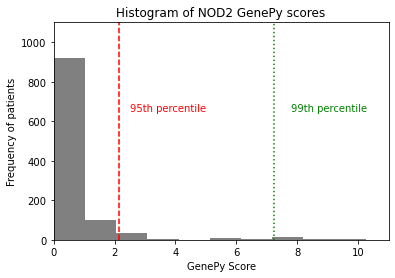

In [81]:
NOD2_series = genepy_df["NOD2"]
n, bins, patches = plt.hist(NOD2_series, color='grey')


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NOD2 GenePy scores')
plt.xlim(0, 11)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NOD2"],95), 
            color='r', 
            linestyle='--')
plt.text(2.5, 650, r'95th percentile',
         color='r')
plt.axvline(np.percentile(genepy_df["NOD2"],99), 
            color='g',
            linestyle=':')
plt.text(7.8, 650, r'99th percentile',
         color='g')
plt.savefig("NOD2_Percentile.png",dpi=300)


In [ ]:
np.percentile(

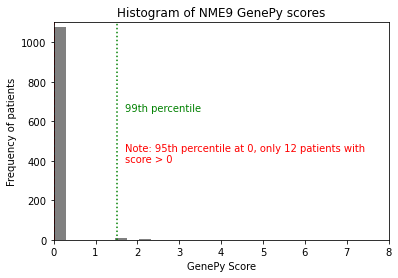

In [82]:
NME9_series = genepy_df["NME9"]
n, bins, patches = plt.hist(NME9_series, color='grey')


plt.xlabel('GenePy Score')
plt.ylabel('Frequency of patients')
plt.title('Histogram of NME9 GenePy scores')
plt.xlim(0, 8)
plt.ylim(0, 1100)
plt.grid(False)
plt.axvline(np.percentile(genepy_df["NME9"],95),
            color='r',
            linestyle='--')
plt.text(1.7, 400, 'Note: 95th percentile at 0, only 12 patients with\nscore > 0', color='r', wrap=True)
plt.axvline(np.percentile(genepy_df["NME9"],99), 
            color='g',
            linestyle=':')
plt.text(1.7, 650, r'99th percentile', color='g')
plt.savefig("NME9_Percentile.png",dpi=300)


In [86]:
np.percentile(genepy_df["NOD2"], 99)

7.249239905477129

## Represent Percentiles/Distrubution between cohorts

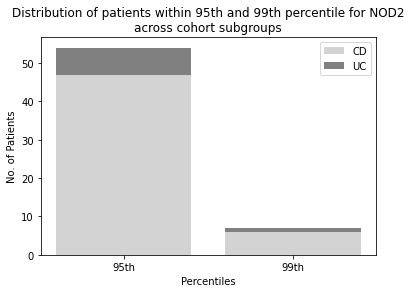

In [140]:
# NOD2
x = ['95th', '99th']
CD = [47, 6]
UC = [7, 1]
UIBD = [0,0]
UC_CD = [0,0]
NOT_IBD = [0,0]

plt.bar(x, CD, color='lightgrey')
plt.bar(x, UC, bottom=CD, color='grey')
plt.xlabel("Percentiles")
plt.ylabel("No. of Patients")
plt.legend(["CD","UC","UIBD","UC_CD", "NOT_IBD"])
plt.title("Distribution of patients within 95th and 99th percentile for NOD2\nacross cohort subgroups")
plt.savefig("NOD2_dist.png",dpi=300)

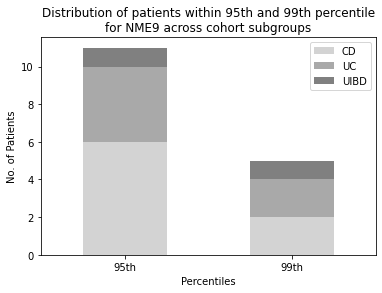

In [138]:
# NME9
df = pd.DataFrame([['95th', 6, 4, 1],
                   ['99th', 2, 2, 1]],
                  columns=['Percentile', 'CD', 'UC', 'UIBD'])
'''
plt.bar(x, CD, hatch='///')
plt.bar(x, UC, bottom=CD, )
plt.bar(x, UIBD, bottom=CD+UC, color='b')
#plt.bar(x, NOT_IBD, bottom=CD+UC+UIBD,color='gray')
'''
df.plot(x='Percentile', kind='bar', stacked=True, color=['lightgrey','darkgrey','grey'])
plt.xlabel("Percentiles")
plt.ylabel("No. of Patients")
#plt.legend(["CD","UC","UIBD", "NOT_IBD"])
plt.title("Distribution of patients within 95th and 99th percentile\nfor NME9 across cohort subgroups")
plt.xticks(rotation = 360) 
plt.savefig("NME3_dist.png",dpi=300)

## Network displaying node with the highest number of 

### Patients
<2 removed 

### Degree
Degree <2 removed

### Betweeness centrality 

## Enrichment analysis from string API

## Functional annotation from string API

## PPI enrichment 
Tests if your network has more interactions than expected

## Get string clusters for a patient 